In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
num_df = df.select_dtypes(include='number')

In [6]:
num_df

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0
...,...,...,...,...,...
9995,1,49,4,2,23.0
9996,7,64,8,5,58.0
9997,6,83,8,5,74.0
9998,9,97,7,0,95.0


In [7]:
X = num_df.drop('Performance Index',axis=1) #num_df[['H',]]
y = num_df['Performance Index']

In [8]:
X

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


In [9]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [10]:
#train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,random_state=42)

In [11]:
model = LinearRegression()

In [12]:
model.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
model.intercept_

np.float64(-33.60206732749268)

In [14]:
model.coef_

array([2.85289351, 1.01703572, 0.47331832, 0.19172629])

In [15]:
model.predict(xtest)

array([55.00786377, 22.31444624, 47.59404705, ..., 16.48182916,
       63.64243731, 46.23799491], shape=(2000,))

In [16]:
ytest

6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
        ... 
6412    45.0
8285    66.0
7853    16.0
1095    65.0
6929    47.0
Name: Performance Index, Length: 2000, dtype: float64

In [17]:
num_df.corr()['Performance Index']

Hours Studied                       0.373730
Previous Scores                     0.915189
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Performance Index                   1.000000
Name: Performance Index, dtype: float64

In [18]:
model.score(xtest,ytest)

0.9887144552384186

In [19]:
pred = model.predict(xtest)

In [20]:
pred

array([55.00786377, 22.31444624, 47.59404705, ..., 16.48182916,
       63.64243731, 46.23799491], shape=(2000,))

In [21]:
# model.score(x,y)
model.score(xtest,ytest)

0.9887144552384186

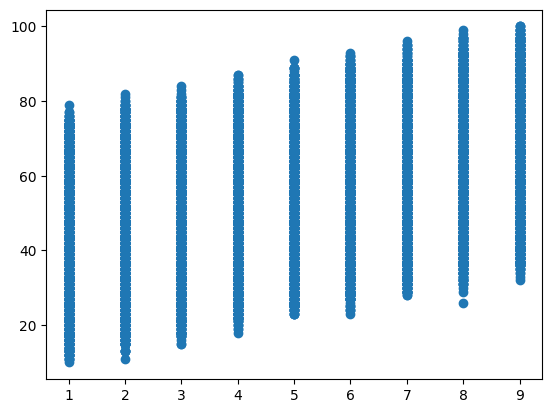

In [22]:
import matplotlib.pyplot as plt

# for col in xtest.columns:
#     plt.scatter(df[col],df['Performance Index'])
plt.scatter(df['Hours Studied'],df['Performance Index'])

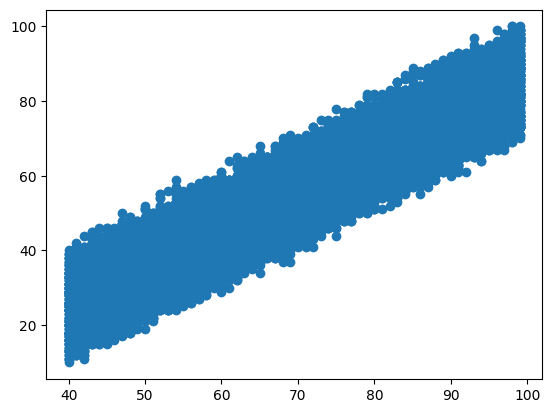

In [23]:
plt.scatter(df['Previous Scores'],df['Performance Index'])


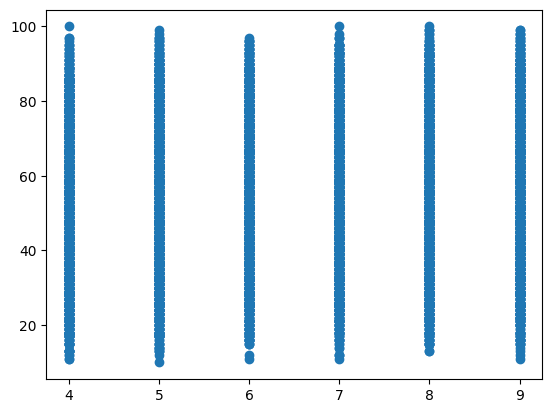

In [24]:
plt.scatter(df['Sleep Hours'],df['Performance Index'])


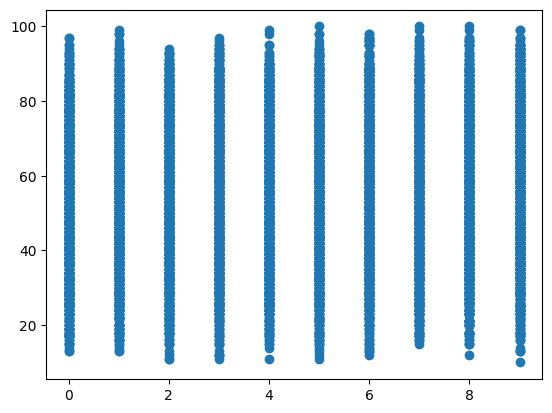

In [25]:
plt.scatter(df['Sample Question Papers Practiced'],df['Performance Index'])


In [26]:
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error

In [27]:
# r2_score()
y_pred = model.predict(xtest)

In [28]:
r2_score(ytest,y_pred)

0.9887144552384186

In [29]:
mean_squared_error(ytest,y_pred)

4.1822549145938135

In [30]:
rmse = root_mean_squared_error(ytest,y_pred)
#np.sqrt(mse)
rmse

2.0450562130645245

In [31]:
target_mean = ytest.mean()
target_mean

np.float64(54.878)

In [32]:
model.score(xtrain,ytrain)

0.9884388348325367

In [33]:
y_pred_train = model.predict(xtrain)

In [34]:
r2_score(ytrain,y_pred_train)

0.9884388348325367

In [35]:
model.score(xtest,ytest)

0.9887144552384186

In [36]:
y_pred_test = model.predict(xtest)
r2_score(ytest,y_pred_test)

0.9887144552384186

In [37]:
from sklearn.preprocessing import StandardScaler

In [ ]:
''' 
fit_transform()
transform()
'''